In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


import tensorflow as tf
from tensorflow.keras import layers, optimizers, models

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
df.shape

(9578, 14)

In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.describe(include='O')

,purpose
count,9578
unique,7
top,debt_consolidation
freq,3957


### 1. Feature Transformation

Transform categorical values into numerical values (discrete)

In [7]:
df['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

df['purpose'] = LabelEncoder().fit_transform(df['purpose'])

### 2. Exploratory data analysis of different factors of the dataset.



In [9]:
print(df.columns)

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')


In [10]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

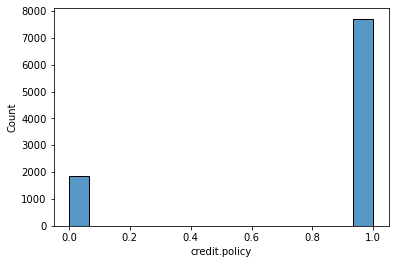

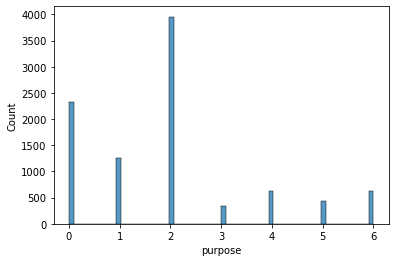

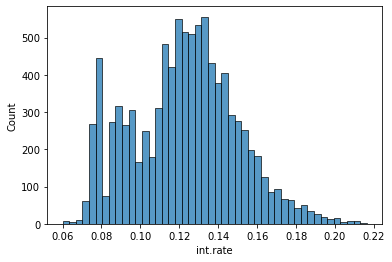

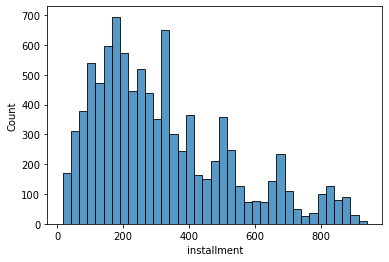

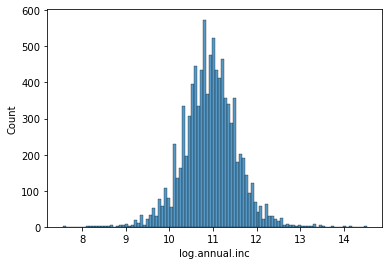

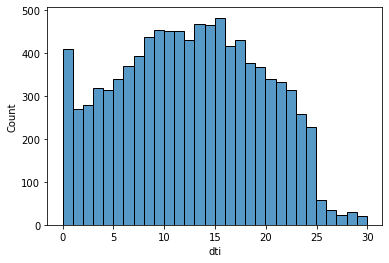

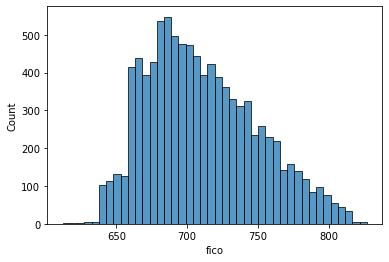

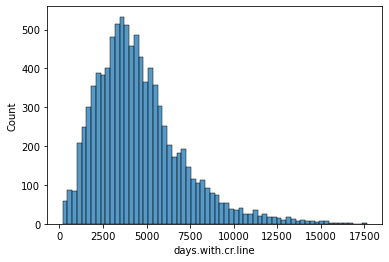

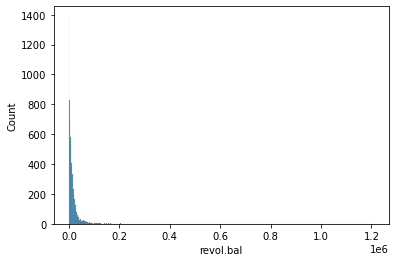

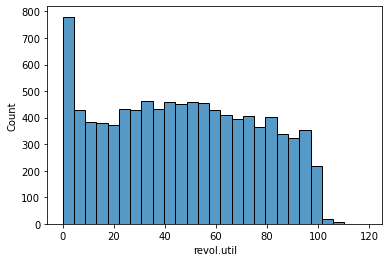

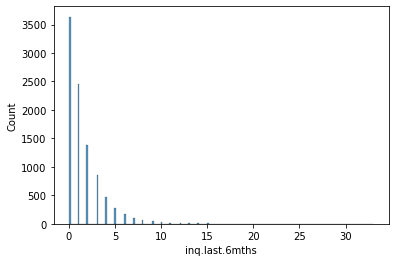

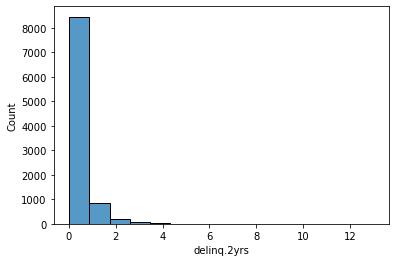

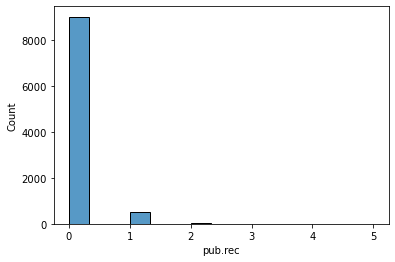

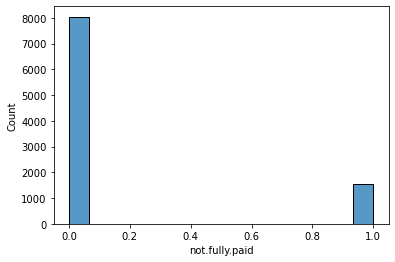

In [11]:
for column in df.columns:
    sns.histplot(x=column, data=df)
    plt.show()

### 3. Additional Feature Engineering
    You will check the correlation between features and will drop those features which have a strong correlation
    This will help reduce the number of features and will leave you with the most relevant features

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, 'credit.policy'),
  Text(1.5, 0, 'purpose'),
  Text(2.5, 0, 'int.rate'),
  Text(3.5, 0, 'installment'),
  Text(4.5, 0, 'log.annual.inc'),
  Text(5.5, 0, 'dti'),
  Text(6.5, 0, 'fico'),
  Text(7.5, 0, 'days.with.cr.line'),
  Text(8.5, 0, 'revol.bal'),
  Text(9.5, 0, 'revol.util'),
  Text(10.5, 0, 'inq.last.6mths'),
  Text(11.5, 0, 'delinq.2yrs'),
  Text(12.5, 0, 'pub.rec'),
  Text(13.5, 0, 'not.fully.paid')])

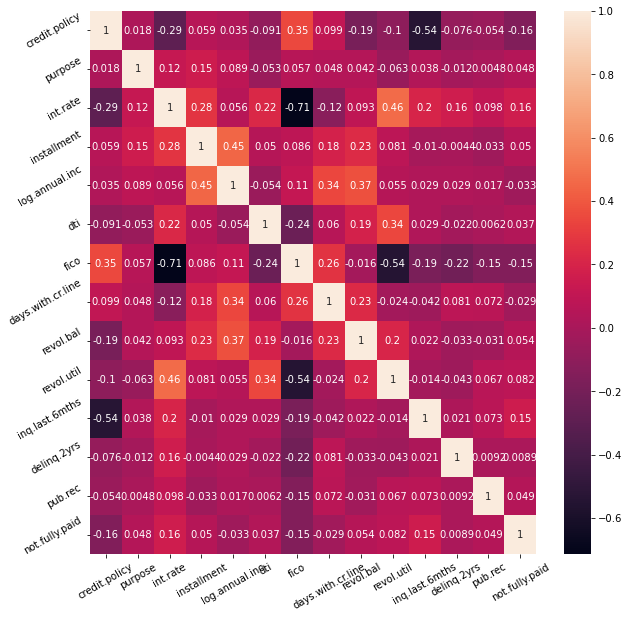

In [12]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.yticks(rotation=30)
plt.xticks(rotation=30)

In [13]:
# fico is correlated with int.rate and revol.util so removing 'fico'

df.drop(columns=['fico'],axis=1,inplace=True)

In [14]:
df.describe()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,1.944038,0.122640,319.089413,10.932117,12.606679,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,1.686881,0.026847,207.071301,0.614813,6.883970,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.000000,0.060000,15.670000,7.547502,0.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.103900,163.770000,10.558414,7.212500,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,2.000000,0.122100,268.950000,10.928884,12.665000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,2.000000,0.140700,432.762500,11.291293,17.950000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,6.000000,0.216400,940.140000,14.528354,29.960000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [15]:
target = df['not.fully.paid']

In [16]:
df.drop(columns='not.fully.paid',axis=1,inplace=True)

In [17]:
from sklearn.preprocessing import StandardScaler

stdsclr = StandardScaler()

df_scaled= stdsclr.fit_transform(df)

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df_scaled,target,train_size=0.8,random_state=42)

In [19]:
y_train = y_train.astype(np.int64)
y_test = y_test.astype(np.int64)

In [20]:
y_train = y_train.values.reshape((y_train.shape[0],1))
y_test = y_test.values.reshape((y_test.shape[0],1))

In [21]:
y_train.shape

(7662, 1)

In [22]:
def build_model():
    model = models.Sequential()

    model.add(layers.Dense(16,activation='relu',input_shape=X_train.shape[1:]))
    model.add(layers.Dense(32,activation='relu'))
    model.add(layers.Dense(1,activation='sigmoid'))

    return model

In [23]:
model = build_model()
model.compile(loss = 'binary_crossentropy' , metrics = ['accuracy'], optimizer= 'RMSprop')
model.summary()
model_hist=model.fit(X_train,y_train,epochs=100,validation_split=(0.2),batch_size=256)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                208       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 785
Trainable params: 785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
24/24 [==============================] - 0s 16ms/step - loss: 0.5840 - accuracy: 0.7482 - val_loss: 0.5028 - val_accuracy: 0.8408
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.8390 - val_loss: 0.4509 - val_accuracy: 0.8421
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4456 - accuracy: 0.8393 - val_

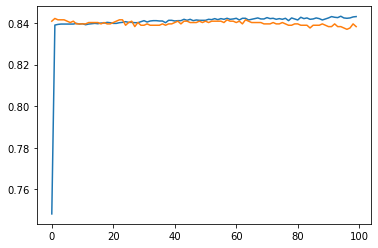

In [24]:
plt.plot(model_hist.history['accuracy'])
plt.plot(model_hist.history['val_accuracy'])
plt.show()

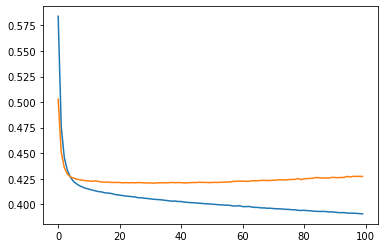

In [25]:
plt.plot(model_hist.history['loss'])
plt.plot(model_hist.history['val_loss'])
plt.show()

In [26]:
model.evaluate(X_test,y_test)

60/60 [==============================] - 0s 833us/step - loss: 0.4125 - accuracy: 0.8372


[0.41249850392341614, 0.8371607661247253]